# Project: Investigating Movie Trends 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I investigated a data set containing information of about 10,000 movies collected from The Movie Database (TMDb), including user ratings, revenue and release dates. Downloading and wrangling the data was the first step to accessing the data. Most of the dataset was clean and only a few entries were missing. Next, I explored the dataset context and variables in order to formulate useful questions about the the data. This step required identification of categorical and numerical variables, and independent and dependent variables. I also looked at stastical summaries of the numerical variables for better intuition of the dataset context. 

Finally, I formulated the following questions that this dataset helped answer.

1. How does movies release vary throughout the year? 
2. Which genres are most popular year on year?
3. Have movie budgets increased over time?
5. Does vote average correlate with popularity?
6. Does budget correlate with popularity?
7. Does budget correlate with vote_average?

The following sections provide details of the respective stages of data analysis.

<a id='wrangling'></a>
## Data Wrangling
### Setting up Preliminaries
I first set up import statements for all the packages that I intended to use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.set()

### Loading Data and Inspection
Here, I loaded the data as a dataframe, and looked at the dataframe's size and information to check for missing data. There were indeed several variables with missing data.


In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

There were 10866 data entries and 21 columns describing respective variables. In order to decide if the missing variables was critical, I looked at the first five rows of the dataframe to determine the variable types and its importance, and formulated an initial plan on addressing missing values

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Trimming

Since I would like to look at associative trends, I would not be using independent variables that were also unique identifiers such as 'id', 'imdb_id', 'homepage', 'tagline', 'overview' and 'keywords'. Also, the real budget and revenue values in the 'budget' and 'revenue' columns would be trimmed away as I would be using the values adjusted for inflation over time in the last two columns ending in '\_adj'. Here, I decided that missing values in these 7 columns were not critical as they will be trimmed later. 

Also my investigative questions did not involve columns, 'cast', 'director' and 'production_companies', so the next concrete actionable was then to trim the 10 columns that were unnecessary. 

While columns 'cast', 'director, 'genres' and 'production_companies' all had missing values, it should be fine to ignore missing values in 'cast', 'director, and 'genres' since less than 1% of the data was missing. This would be confirmed by later observation of data entries for which these variables are missing. It may be of potential concern that more than 10% of data is missing for 'production_companies', but this column would be trimmed away anyhow since my investigative questions did not involve production companies.

| Variables | Independent or Dependent| Data Complete? | Critical to Qns? | Potential next action| 
| --- | --- | --- | --- |
| original_title | Independent | Yes | Yes | Keep for identification |
| genres | Independent | No | Yes | < 1% of data missing, ignore missing rows |
| cast | Independent | No | No |  Trim |
| director | Independent | No | No | < 1% of data missing, Trim |
| production_companies | Independent | No | No | ~10% of data missing, Trim |
| runtime| Independent | Yes | Yes | Keep |
| release date | Independent | Yes | Yes | Keep |
| release year | Independent | Yes | Yes | Keep |
| popularity | Dependent | Yes | Yes | Keep |
| vote_average | Dependent | Yes | Yes |  Keep |
| vote_count | Dependent | Yes | Yes | Keep |
| budget_adj | Independent | Yes | Yes | Keep |
| revenue_adj | Dependent | Yes | Yes | Keep|
| budget | Independent | Yes | No | Trim |
| revenue| Dependent  | Yes | No | Trim |
| id | Independent| Yes | No | Trim |
| imdb_id| Independent  | Yes | No | Trim |
| homepage| Independent  | No | No | Trim |
| tagline| Independent  | No | No | Trim |
| overview| Independent  | No | No | Trim |
| keywords| Independent | No | No | Trim |

In [4]:
df_new = df.drop(columns = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', \
                            'director', 'cast', 'revenue', 'budget'])

### Cleaning Data
Next, I looked at the statistical summary of the new dataframe to check if the dataset needed further cleaning. Most of the statistics were within expectations except for three anomalies.

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


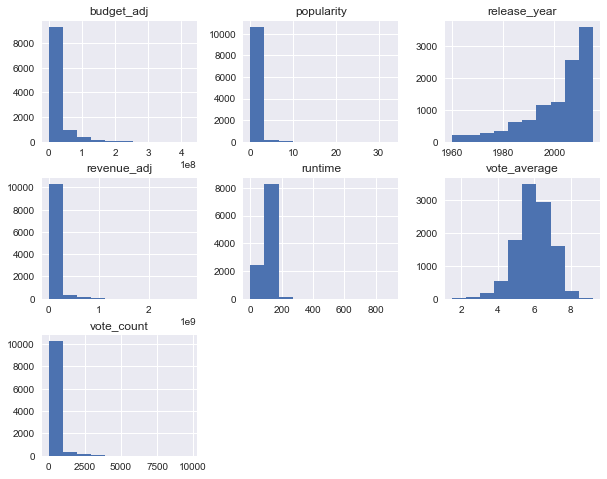

In [6]:
df_new.hist(figsize = (10,8));
df_new.describe()

#### Budget and Revenue Anomaly
A substantial portion of the data entries had adjusted budget and revenue values that are zero. This was not a real effect and my guess would be that a default value of zero was entered for data entries where budget and revenue information were not available. When exploring data and forming conclusions for adjusted budget and revenue, I would exclude data entries for which these two values are zero.

#### Popularity Anomaly
There was an outlier of popularity value 32 while most movies had a popularity value between 0.2 to 0.7. According to [TMDB] (https://developers.themoviedb.org/3/getting-started/popularity), popularity value is dependent on the following factors. 
* Number of votes for the day
* Number of views for the day
* Number of users who marked it as a "favourite" for the day
* Number of users who added it to their "watchlist" for the day
* Release date
* Number of total votes
* Previous days score

Since many of these factors required people to go on the internet to vote, view the movie page, mark as favorite, or add as watchlist, and the number of people going on the internet is increasing as the years progressed, it is reasonable to assume that a movie's popularity would depend on the release year of the movies. For e.g. a movie released in 1960 would be more likely to have a lower popularity value than one released in 2017. A scatter plot of Popularity vs Release Year showed this to be true. For a sanity check, I displayed movies with popularity values > 20 to see if those movies were at least recognisable. I would say that "Jurassic World", "Mad Max" and "Interstellar" were popular movies. **Fun Fact**: Mad Max won the [most Academy Awards](http://oscar.go.com/news/winners/mad-max-fury-road-wins-the-most-2016-oscars) in 2016! While there outliers with extreme values, all data entries for popularity made sense and was kept.  

,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
629,24.949134,Interstellar,169,Adventure|Drama|Science Fiction,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08


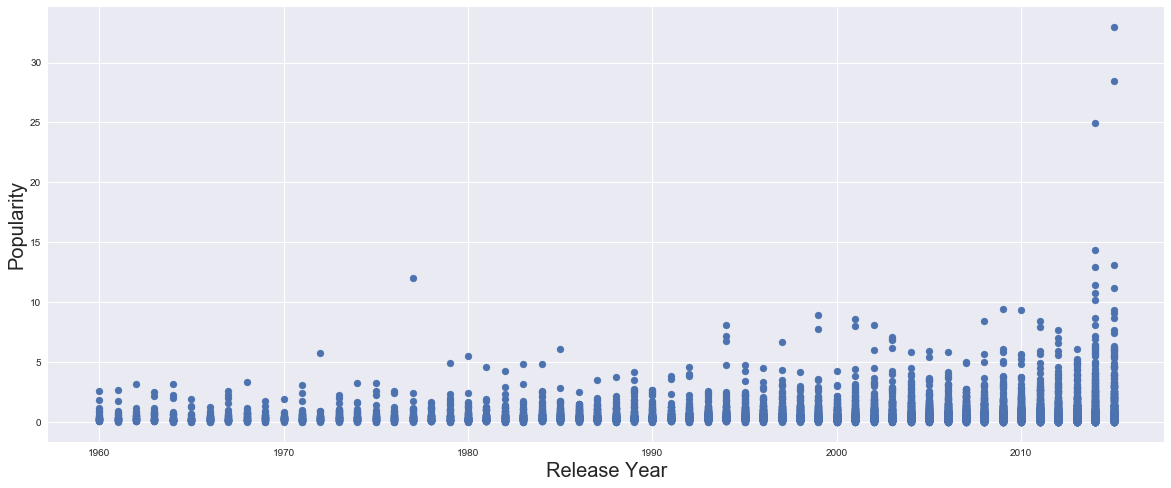

In [7]:
# Popularity vs Release Year
plt.figure(figsize=(20,8))
plt.scatter(df_new.release_year,df_new.popularity);
plt.xlabel('Release Year',fontsize=20);
plt.ylabel('Popularity',fontsize=20);

# list out movies with popularity values > 20
df_new[df_new.popularity > 20]

#### Runtime Anomaly
Also, I observed that some movies had very short runtime. Since I would like to look at the data for full length movies, I would like to exclude these short films. I used the [Academy Awards'](http://www.oscars.org/sites/oscars/files/90aa_rules.pdf) definition of short and feature films to split the dataset into two categories and looked at their respective statistical summaries, which were within expectations. From here on, all data analysis was done on movies, i.e. full length feature films of more than 40 minutes in runtime.


SHORT FILM INFO


,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,2.510000e+02
mean,0.357611,12.103586,50.605578,6.642629,2005.585657,3.963157e+05,2.130329e+05
std,0.606817,10.113616,72.656781,0.887545,11.618762,4.051674e+06,2.938398e+06
min,0.002757,0.000000,10.000000,3.300000,1963.000000,0.000000e+00,0.000000e+00
25%,0.095341,4.000000,14.000000,6.050000,2004.000000,0.000000e+00,0.000000e+00
50%,0.218528,8.000000,25.000000,6.800000,2010.000000,0.000000e+00,0.000000e+00
75%,0.439978,22.000000,49.000000,7.300000,2012.000000,0.000000e+00,0.000000e+00
max,8.411577,40.000000,507.000000,8.400000,2015.000000,6.310011e+07,4.597555e+07


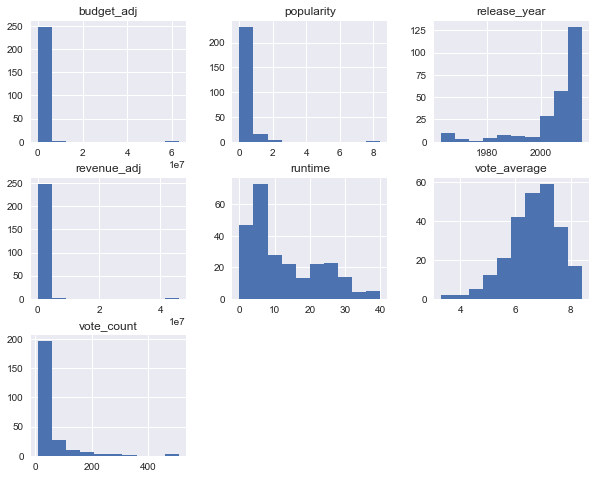

In [7]:
short_film = (df_new.runtime <= 40)
feature_film = (df_new.runtime > 40)

print ("SHORT FILM INFO")
df_new[short_film].hist(figsize=(10,8));
df_new[short_film].describe()

FEATURE FILM INFO


,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10615.000000,10615.000000,10615.000000,10615.000000,10615.000000,1.061500e+04,1.061500e+04
mean,0.653271,104.198210,221.333490,5.959133,2001.221856,1.795668e+07,5.257388e+07
std,1.006645,28.455862,581.700144,0.930496,12.823190,3.460106e+07,1.461154e+08
min,0.000065,41.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.210596,90.000000,17.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.386529,99.000000,39.000000,6.000000,2005.000000,0.000000e+00,0.000000e+00
75%,0.721961,112.000000,149.500000,6.600000,2011.000000,2.163338e+07,3.560371e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


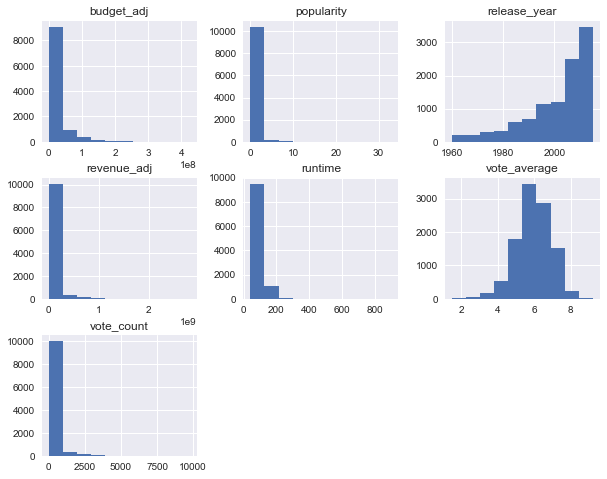

In [8]:
df_movies = df_new[feature_film]

print ("FEATURE FILM INFO")
df_new[feature_film].hist(figsize=(10,8));
df_new[feature_film].describe()

### Errant / Missing Data

Now that the dataset was trimmed, I then checked if my initial intuition of ignoring missing values for 'genres' was accurate by comparing the statistical summaries from ignoring these missing entries with the full dataset, i.e. `df_movies`. The general statistical values and figures matched that of the full dataset.

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10598.000000,10598.000000,10598.000000,10598.000000,10598.000000,1.059800e+04,1.059800e+04
mean,0.654027,104.214663,221.660125,5.958275,2001.214663,1.798548e+07,5.265821e+07
std,1.007260,28.435382,582.109095,0.929475,12.823990,3.462132e+07,1.462173e+08
min,0.000065,41.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.210765,90.000000,17.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.387136,99.000000,39.000000,6.000000,2005.000000,0.000000e+00,0.000000e+00
75%,0.722713,112.000000,150.000000,6.600000,2011.000000,2.163338e+07,3.583142e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


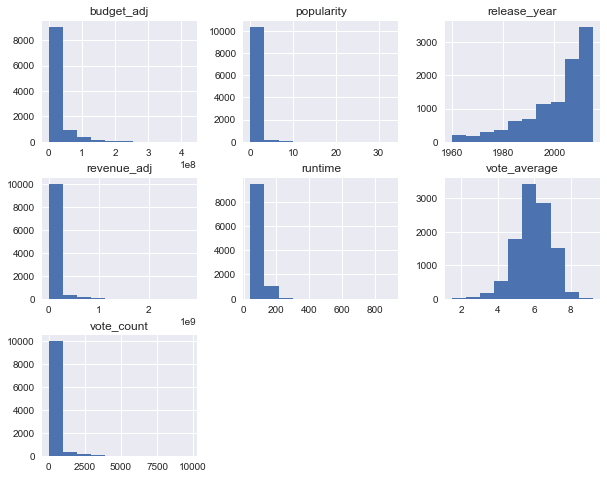

In [10]:
df_movies[df_movies.genres.notna()].hist(figsize=(10,8));
df_movies[df_movies.genres.notna()].describe()

### Rehashing data
I reorganized data in the original dataset into new columns that would be easier to manipulate when exploring answers to my investigative questions. I created new columns for release decade `release_decade` and release month `release_month`, and also split the genres information `genres_sp` into individual entries in a new dataframe. 

In [9]:
# Make new column for release decade
df_movies.loc[:,'release_decade'] = df_movies.loc[:,'release_year'].apply(lambda x : x - x%10 )

# Make new column for release month
def get_month(string_date):
    split_str = str(string_date).split('/')
    return float(split_str[0])

df_movies.loc[:,'release_month'] = df_movies.loc[:,'release_date'].apply(get_month)

# Make new column genres_sp in new dataframe
COL_genres = df_movies.genres.str.split('|', expand=True).stack() 
COL_genres_test = pd.Series(index=COL_genres.index.droplevel(1), data = COL_genres.values, name = 'genres_sp')
df_sp_genres = df_movies.join(COL_genres_test)

c:\python27\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\python27\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<a id='eda'></a>
## Exploratory Data Analysis

In this section, I created visualizations and computed statistics to address the investigative questions posed in the introduction section. 

### Question 1- How does movies release vary throughout the year? 
This question arose from a personal observation that there was a dearth of good movies to watch in the months of January to March, compared to a whole slew of critically acclaimed movies from October to December. 

I first created a histogram to display the distribution of movies released throughout the year. I also overlaid the mean of movies released in each month to give a better sense of the data variation.

As we could see from movie data collected from years 1960 to 2015, more movies were released in the later half of the year compared to the first half of the year. Specifically, number of movies released from January to July fell below the mean, with a spike in months September and October.  

count      12.000000
mean      884.583333
std       175.895867
min       683.000000
25%       788.000000
50%       806.500000
75%       917.250000
max      1318.000000
Name: original_title, dtype: float64

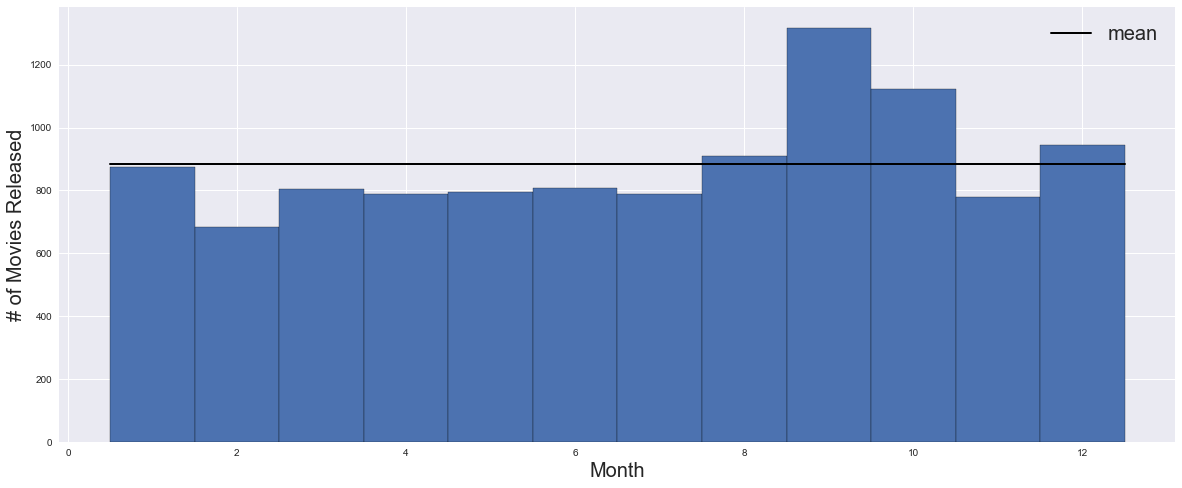

In [10]:
df_movies.release_month.hist(figsize=(20,8),bins=np.arange(0.5,13.5), rwidth = 1, edgecolor='black');
plt.xlabel('Month', fontsize = 20);
plt.ylabel('# of Movies Released', fontsize = 20);

df_month = df_movies.groupby('release_month')
plt.plot([0.5, 12.5], [df_month.original_title.count().mean(), df_month.original_title.count().mean()], 
         'k-', lw=2, label = 'mean');
plt.legend(prop={'size': 20});

df_month.original_title.count().describe()


### Question 2 - Which genres are most popular year on year?

The most popular genre for the year was defined as the genre that received the highest mean popularity value for that year. Since I was looking at a year on year (yoy) comparison, the most popular genre yoy was the one that was most popular for the most number of times spanning the years that the dataset was collected. Doing a yoy comparison this way eliminated temporal extraneous effects that I observed while cleaning the data, i.e. popularity values of a movies increased with release years, possibly because of the greater number of internet users. 

I first grouped the data by release year and determined the genre that had the highest mean popularity value for each year. Then, I evaluated the genre that was most popular the most number of times throughout the years. 

This approach would provide only the most popular genre yoy. To get a better intutition of top few popular genres, I reported the top, 2nd, 3rd, 4th and 5th most popular genres yoy. The most popular genres are 

1. Adventure
2. Action
3. Science Fiction


In [17]:
df_year= df_sp_genres.groupby('release_year', as_index = False)
genre_name =  pd.DataFrame()
num_pop = 5

# populate genre_name with top, 2nd, 3rd, 4th and 5th most popular movies for each year
for year, grp_year in df_year:
        df_genres_year = grp_year.groupby('genres_sp',as_index = False)
        for pnum in range(num_pop):
            genre_name.loc[year, pnum] =  df_genres_year.popularity.mean().\
                                    sort_values(by='popularity',ascending=False). \
                                    reset_index(drop=True).genres_sp[pnum]

# display genres that had the most counts for top, 2nd, 3rd, 4th and 5th most popular movies            
genre_name.apply(lambda x:x.value_counts().index[0])

0          Adventure
1          Adventure
2          Adventure
3             Action
4    Science Fiction
dtype: object

### Question 3 - Have movie budgets increased over time?

As the movie industry matured with increasing use of technology (CGI, advanced sets, costumes etc) and movie makers spend more on distribution and marketing, I had a hunch that movies' budgets were increasing with time. 

First, I created a new dataframe that was a subset of `df_movies` with both budget and revenue values greater than zero to remove erroneous data entries where budget and revenue information were not available. I had first created a boxplot showing budget variation against release year, but the plot was overcrowded with about 55 years of data. So I presented a boxplot of budget vs release decade. Several observations were evident from the boxplot

* There was no clear pattern in decade-to-decade variation of movie budgets. 
* There were many outliers with extremely high budget values.

I then plotted a year-to-year variation of budget median. There was indeed no evident relationship between budget and release year. However, one could conclude from the decade-to-decade boxplot that there was an increasing number and mean of outliers, i.e. number of movies with extremely high budgets and their corresponding mean budget.


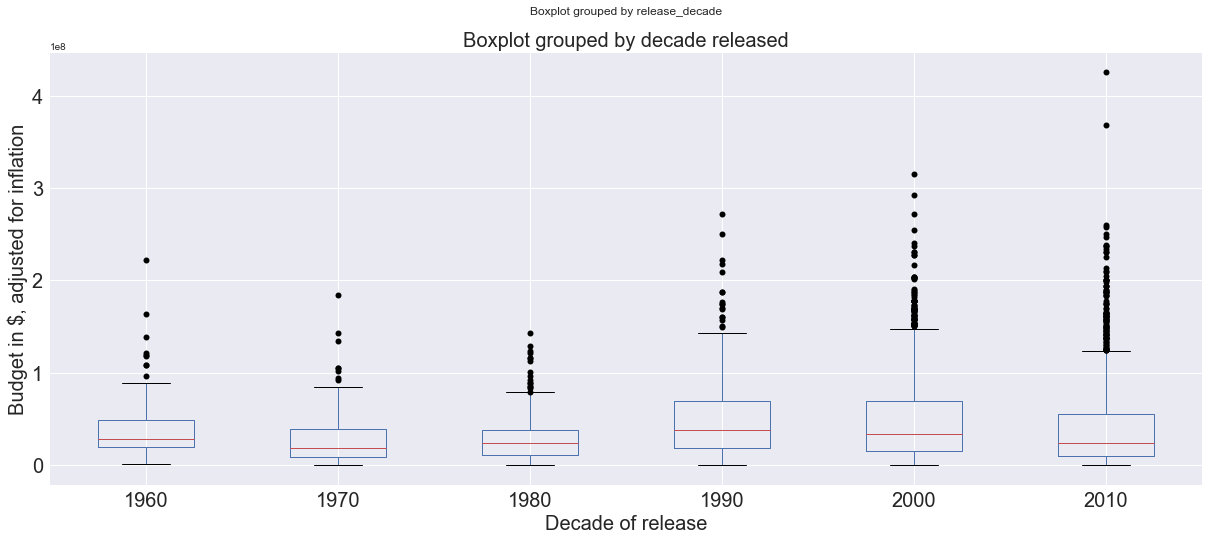

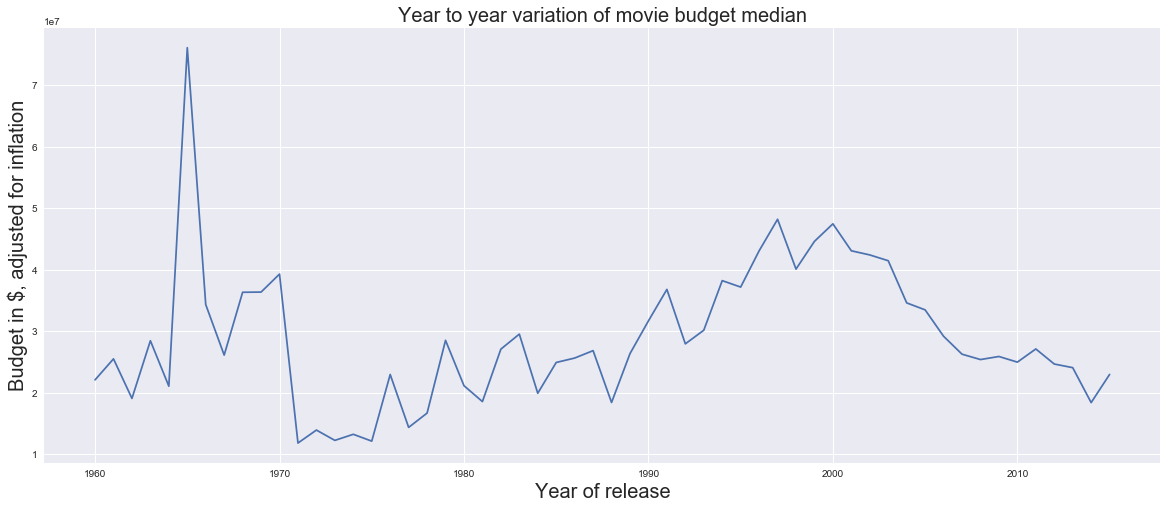

In [18]:
# remove values with $0 budget, or $0 revenue, which are most likely erroneous values
df_movies_wBudRev = df_movies[df_movies.budget_adj != 0]
df_movies_wBudRev = df_movies_wBudRev[df_movies_wBudRev.revenue_adj != 0]

# figure for budget vs release decade- boxplot;
df_movies_wBudRev.boxplot(column='budget_adj', by='release_decade', sym='k',figsize=(20,8),fontsize = 20);
plt.ylabel('Budget in $, adjusted for inflation', fontsize=20);
plt.xlabel('Decade of release', fontsize=20);
plt.title('Boxplot grouped by decade released', fontsize =20)
plt.show();

# figure for budget median vs release year;
df_movies_wBudRev_grp = df_movies_wBudRev.groupby('release_year')
plt.figure(figsize=(20,8));
plt.plot(df_movies_wBudRev_grp.budget_adj.median());
plt.ylabel('Budget in $, adjusted for inflation', fontsize=20);
plt.xlabel('Year of release', fontsize=20);
plt.title('Year to year variation of movie budget median', fontsize =20);


###  Investigating relationship between variables.

### 5. Does vote average correlate with popularity?

I looked at the relationship between vote average and popularity. This would answer the question of whether popular movies receive higher ratings and indeed we see that there is a moderate connection between popularity and vote average. 

Pearson's correlation, r = 0.32


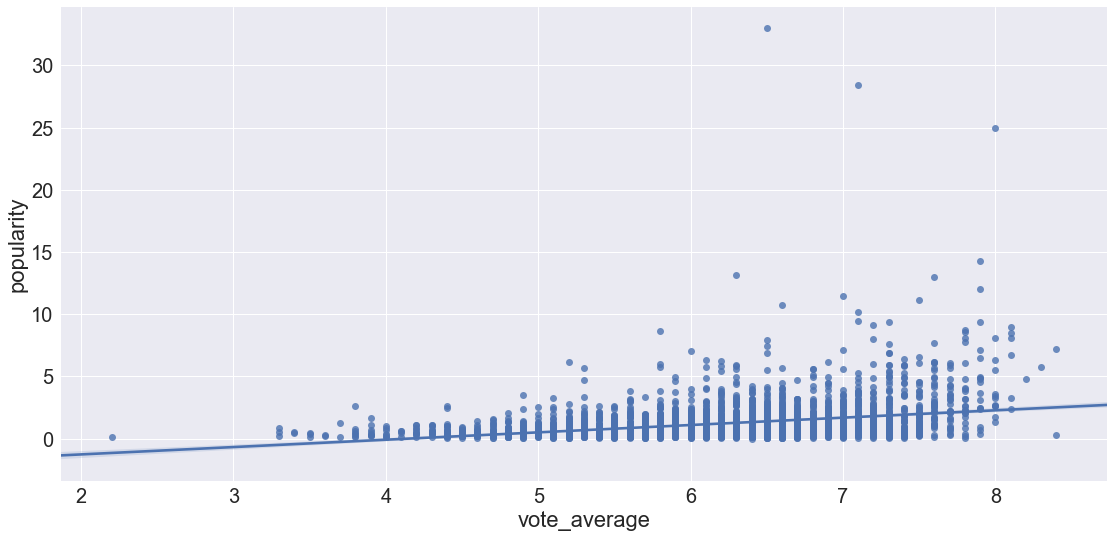

In [19]:
sns.set(font_scale=2)
sns.lmplot(x='vote_average', y='popularity', data = df_movies_wBudRev, size=8, aspect=2);
print "Pearson's correlation, r = " + str(round(df_movies_wBudRev.vote_average.corr(df_movies_wBudRev.popularity),2))

### 6. Does budget correlate with popularity?

This next question followed from question 6. I assumed that movie makers spend more money so that it could reach a greater audience, so one could hypothesize that movies with higher budget would be more popular, i.e. get more website visits, 'favorite-d' more etc. Indeed, there was a moderate relationship between budget and popularity. 

Pearson's correlation, r = 0.4


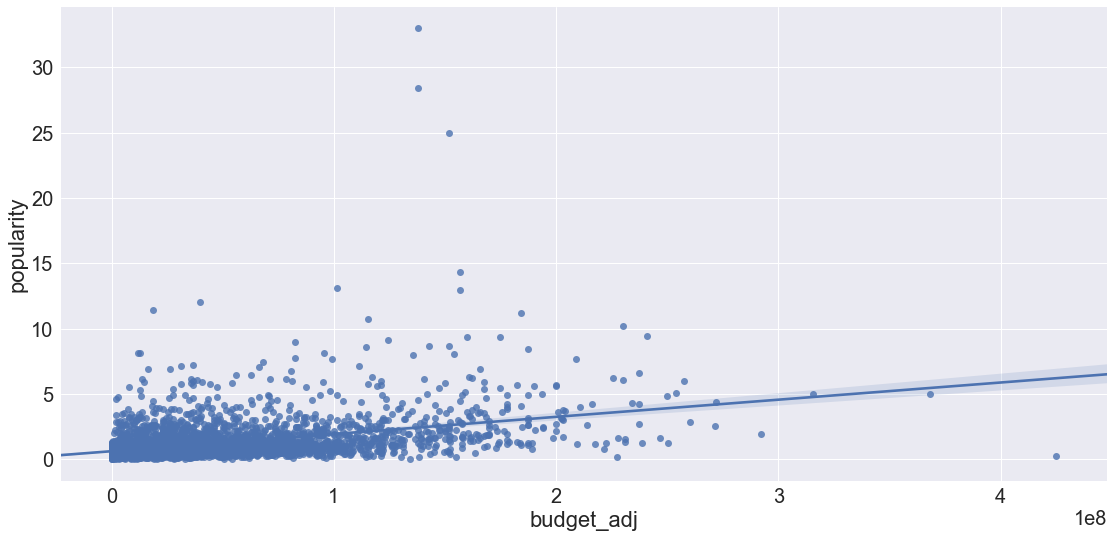

In [20]:
sns.set(font_scale=2)
sns.lmplot(x='budget_adj', y='popularity', data = df_movies_wBudRev, size=8, aspect=2);
print "Pearson's correlation, r = " + str(round(df_movies_wBudRev.budget_adj.corr(df_movies_wBudRev.popularity),2))

### 7. Does budget correlate with vote_average?
Since there was a moderate conenction between popularity and vote average, and budget and popularity, one would expect there to be some moderate connection between budget and vote_average. However, I found that there was no evidvent connection between budget and vote average. 

This could mean that while a greater budget could lead to greater marketing efforts and higher popularity, it did not necessarily result in a particular movie garnering higher ratings. There could be other variables at here, e.g. quality of script/ story and cast. This would need to be studied in greater detail and with more data/ information. 

Pearson's correlation, r = 0.04


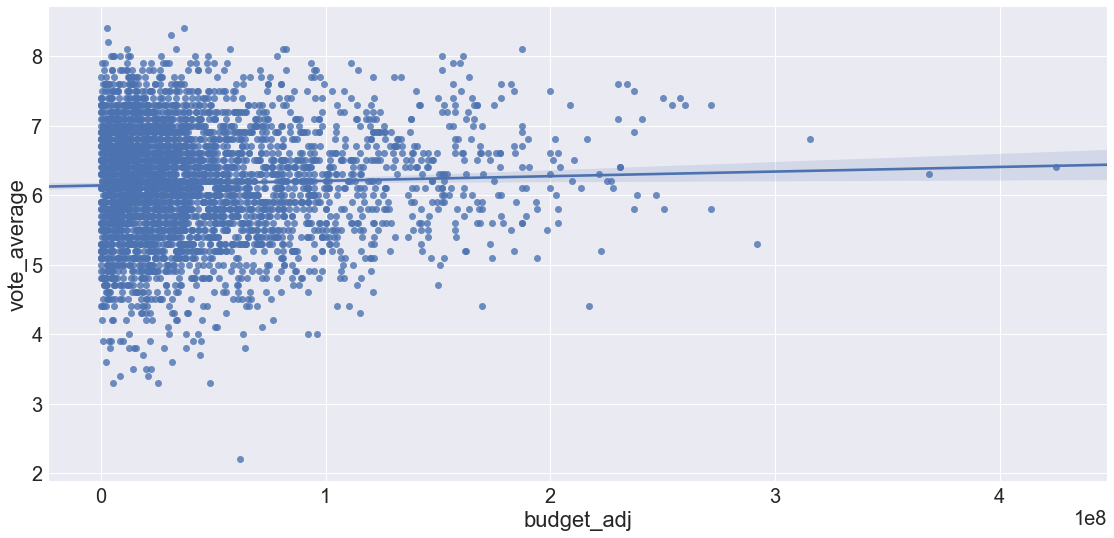

In [21]:
sns.set(font_scale=2)
sns.lmplot(x='budget_adj', y='vote_average', data = df_movies_wBudRev, size=8, aspect=2);
print "Pearson's correlation, r = " + str(round(df_movies_wBudRev.budget_adj.corr(df_movies_wBudRev.vote_average),2))

<a id='conclusions'></a>
## Conclusions

I was able to answer the following questions from analyzing the movie dataset. While there was some correlation between variables for question 4 and 5, it was important to note that it did not imply causation, i.e. movie popularity caused higher vote average, or higher budget caused greater popularity. 

1. How does movies release vary throughout the year?
    - There were more movies released in later half of the year compared to first half. 
2. Which genres are most popular year on year?
    - Action, Adventure and Science Fiction
3. Have movie budgets increased over time?
    - There was no evidence that this was true.
4. Does vote average correlate with popularity? 
    - There was a moderate correlation between the two variables.
5. Does budget correlate with popularity?
    - There was a moderate correlation between the two variables.
6. Does budget correlate with vote_average?
    - There was no correlation between the two variables

There are some limitations to this data analysis, some of which are 

1. Long term revenue
    - Revenue sources such as audio rights and franchised goods are not included. 
2. Missing values
    - Ignoring missing values such as that in the genre category could skew our analysis and introduce unintentional bias towards relationships
3. Production location
    - While all budget and revenue numbers are reported in the same currency, it should be noted that shooting and production costs vary by countries. The same dollar equivalent has different buying power in different countries, and the budget value does not account for that. 